In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

In [62]:
def generate_scores(mean=60,std_dev=12,num_samples=200):
	np.random.seed(27)
	scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
	scores = np.round(scores, decimals=0)
	return scores
scores_data = generate_scores()
print(scores_data)

[75. 56. 67. 65. 63. 59. 58. 63. 70. 75. 67. 65. 53. 48. 75. 54. 57. 57.
 57. 54. 53. 66. 62. 55. 65. 45. 65. 29. 69. 49. 58. 81. 91. 58. 61. 65.
 50. 78. 65. 63. 72. 46. 73. 61. 60. 70. 42. 67. 82. 72. 74. 69. 58. 64.
 70. 65. 44. 90. 60. 58. 52. 52. 63. 59. 65. 56. 44. 58. 58. 45. 61. 42.
 51. 67. 61. 75. 72. 71. 58. 67. 60. 69. 62. 64. 52. 58. 75. 35. 43. 63.
 62. 67. 72. 72. 58. 64. 64. 53. 47. 45. 45. 67. 73. 78. 69. 66. 69. 59.
 57. 63. 66. 34. 45. 63. 65. 61. 47. 68. 53. 70. 73. 70. 38. 78. 62. 83.
 60. 67. 61. 57. 64. 63. 48. 61. 88. 84. 62. 67. 39. 56. 72. 66. 62. 67.
 77. 60. 46. 59. 65. 59. 54. 79. 38. 46. 50. 72. 61. 47. 65. 29. 71. 59.
 65. 46. 56. 67. 62. 64. 57. 76. 64. 64. 73. 62. 61. 38. 20. 55. 63. 55.
 39. 51. 70. 58. 43. 54. 82. 65. 67. 50. 56. 54. 72. 54. 42. 76. 67. 74.
 98. 53.]


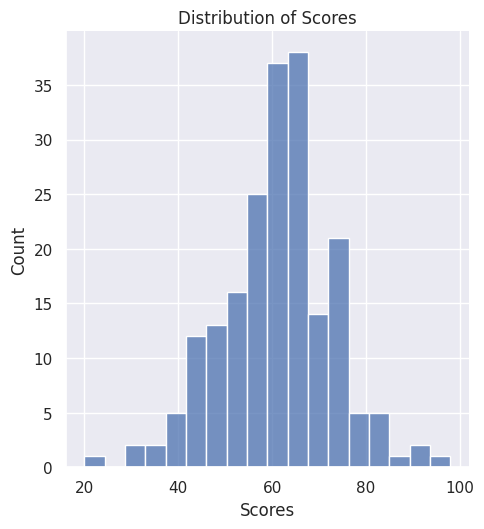

In [63]:
sns.set_theme()
sns.displot(data=scores_data).set(title="Distribution of Scores", xlabel="Scores")

**Generate Mean and Standard Deviation**

In [64]:
df_scores = pd.DataFrame(scores_data,columns=['score'])
df_scores.mean()

score    61.005
dtype: float64

In [65]:
df_scores.std()

score    11.854434
dtype: float64

In [66]:
lower_limit = df_scores.mean() - 3*df_scores.std()
upper_limit = df_scores.mean() + 3*df_scores.std()
print(lower_limit)
print(upper_limit)

score    25.441697
dtype: float64
score    96.568303
dtype: float64


In [67]:
df_scores_filtered = df_scores[
    (df_scores['score'] > lower_limit.values[0]) & (df_scores['score'] < upper_limit.values[0])
]
print(df_scores_filtered)

     score
0     75.0
1     56.0
2     67.0
3     65.0
4     63.0
..     ...
194   42.0
195   76.0
196   67.0
197   74.0
199   53.0

[198 rows x 1 columns]


**OUTLIER DETECTION**

Generating Z score column

In [68]:
df_scores['z_score']=(df_scores['score'] - df_scores['score'].mean())/df_scores['score'].std() #Z = (x-mean)/std
df_scores.head()

,score,z_score
0,75.0,1.180571
1,56.0,-0.422205
2,67.0,0.505718
3,65.0,0.337005
4,63.0,0.168291


Filtering based on Z score

In [69]:
df_scores_filtered = df_scores[(df_scores['z_score']>-3) & (df_scores['z_score']<3)]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[198 rows x 2 columns]


 **Detect Outliers Using the Interquartile Range (IQR)**


[Text(0.5, 1.0, 'Box Plot of Scores')]

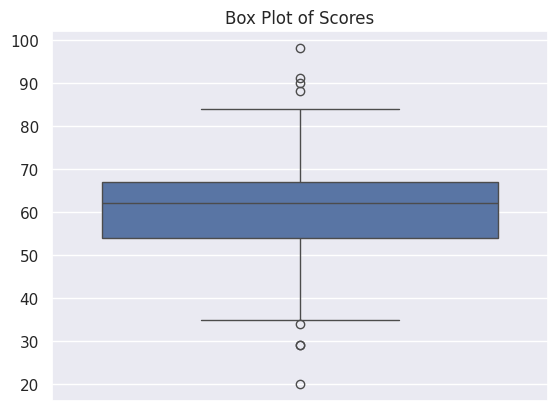

In [70]:
sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

In [71]:
df_scores.describe()

,score,z_score
count,200.000000,2.000000e+02
mean,61.005000,-2.131628e-16
std,11.854434,1.000000e+00
min,20.000000,-3.459043e+00
25%,54.000000,-5.909181e-01
50%,62.000000,8.393484e-02
75%,67.000000,5.057179e-01
max,98.000000,3.120773e+00


We use the 25% and 75% quartile values from the above result to compute IQR and subsequently set the lower and upper limits to filter df_scores

In [72]:
IQR = 67-54
lower_limit = 54 - 1.5*IQR
upper_limit = 67 + 1.5*IQR
print(upper_limit)
print(lower_limit)

86.5
34.5


Filter

# Detect Outliers Using Percentile


In [73]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[192 rows x 2 columns]


**Detect Outliers Using Percentile**

In [74]:
q25,q75 = np.percentile(a = df_scores,q=[25,75])
IQR = q75 - q25
print(IQR)

61.91606516404945


In [75]:
lower_limit, upper_limit = np.percentile(a=df_scores,q=[0.5,99.5])
print(upper_limit)
print(lower_limit)

90.005
-2.6998335925602515


--------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------

**Outlier Detection And Removal**

In [77]:
import sklearn
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [78]:
# Load the dataset
diabetics = load_diabetes()

In [79]:
# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


Visualizing and Removing Outliers Using Box Plot

<Axes: ylabel='bmi'>

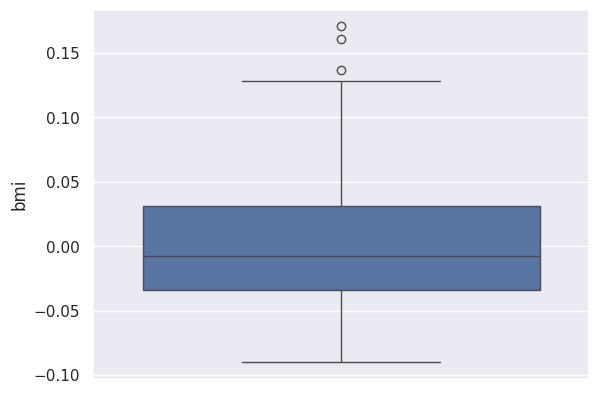

In [81]:
sns.boxplot(df_diabetics['bmi'])

In [83]:
def removal_box_plot(df, column, threshold):
  sns.boxplot(df[column])
  plt.title(f'Original Box Plot of {column}')
  plt.show()
  removed_outliers = df[df[column] <= threshold]
  sns.boxplot(removed_outliers[column])
  plt.title(f'Box Plot without Outliers of {column}')
  plt.show()
  return removed_outliers

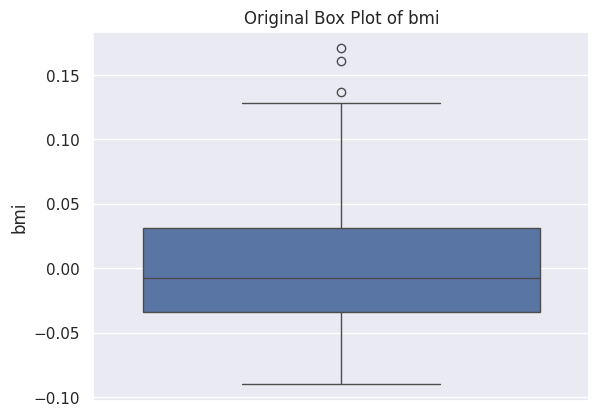

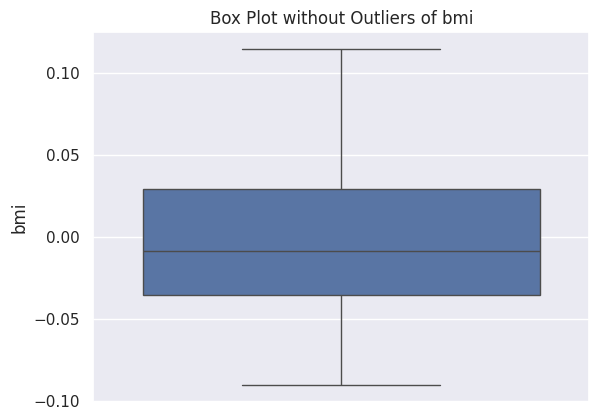

In [84]:
threshold_value = 0.12
no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)

**Visualizing and Removing Outliers Using Scatterplot**

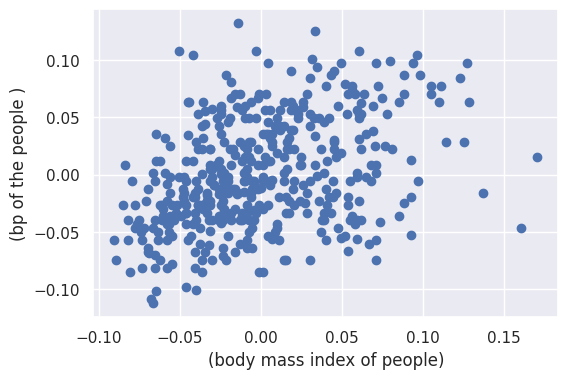

In [85]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()

**Removal of Outliers in BMI and BP Column Combined**

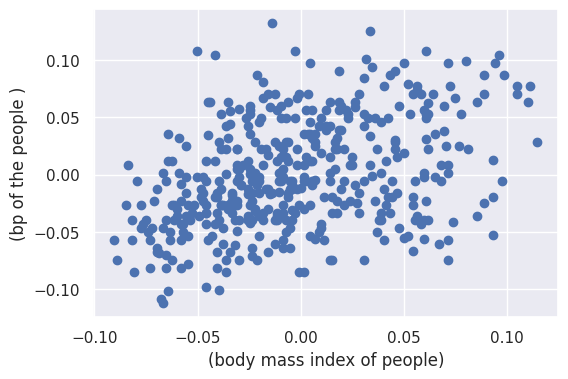

In [89]:
outlier_indices = np.where((df_diabetics['bmi'] > 0.12) &
 (df_diabetics['bp'] < 0.8))

no_outliers = df_diabetics.drop(outlier_indices[0])

# Scatter plot without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()

# **Z-Score** using SciPy stats module

In [90]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


# Removal of Outliers with Z-Score Let's remove rows where Z value is greater than 2

In [91]:
import numpy as np
threshold_z = 2
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


# Using IQR

In [92]:
# IQR
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.06520763046978838


In [94]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 0.12879000811776306
3
Lower Bound: -0.13204051376139045
0


Outlier Removal in Dataset using IQR

In [97]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]
# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)
# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)

Old Shape:  (442, 10)
New Shape:  (439, 10)
